# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | Alexandre Bleau — BLEA14058906 / David Létinaud  — LETD05129708 / Thomas Lioret   — LIOT20069605|
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2019                                            |
| Groupe                | 1                                                       |
| Numéro du laboratoire | 2                                                       |
| Professeur            | Prof. LOMBAERT                                          |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 27/10/2019                                              |

## Introduction

Au cours de ce second laboratoire, nous allons étudier l’utilisation de trois algorithmes de classification. Nous utiliserons les arbres de décision comme vu précédemment, Bayes naïf et les K plus proches voisins (KNN). Nous allons aborder deux problèmes : la classification des galaxies ansi que la classification des courriels indésirables.
Afin de classer les galaxies en « spirales » ou « smooth », nous allons nous appuyer sur deux nouveaux algorithmes (Bayes naïf et KNN) ainsi que des prétraitements de données adaptées (MinMaxScaler). Dans le deuxième cas nous utiliserons également ces deux nouveaux algorithmes et ajouterons un cas de prétraitement supplémentaire (Discrétisation non-supervisée).
Enfin nous appliquerons le concept de validation croisée (cross-validation) et nous le comparerons à la validation holdout.

## Question 1
### Méthode de création des ensembles de données
Pour éviter de recalculer plusieurs fois les features, il peut être plus efficace de les enregistrer pour pouvoir les réutiliser par la suite. On va par exemple enregistrer les features utilisées dans le TP1 dans un fichier csv. Pour cela, on utilise la bibliothèque 'csv' et on ouvre un fichier en écriture. On utilisera ensuite la fonction 'writerows' pour écrire dans ce fichier une list en format compatible csv.

In [46]:
from skimage import io

import csv
from color import crop_center
from main_functions import  FeaturesProcess

In [47]:
#dataset_path = "/home/ens/AQ38840/Desktop/data/data/csv/galaxy/galaxy_label_data_set.csv"
#dataset_path = "/home/alex/Desktop/GTI770-tp2/csv/galaxy/galaxy_feature_vectors.csv"
dataset_path = "/Users/thomas/Desktop/COURS_ETS/gti770/data/csv/galaxy/galaxy_feature_vectors.csv"
#image_path = "/home/ens/AQ38840/Desktop/data/data/images/"
#image_path = "/home/alex/Desktop/GTI770-tp2/csv/images/"
image_path = "/Users/thomas/Desktop/COURS_ETS/gti770/data/images/"
# Fichier de sortie
TP1_features_path = "/Users/thomas/Desktop/COURS_ETS/gti770/tp1/git_tp1/GTI770/GTI770_Laboratoire2_-_BLEA14058906_LETD05129708_LIOT20069605/TP1_features.csv"
#TP1_features_path = "/home/alex/Desktop/GTI770-tp2/csv/galaxy/TP1_features.csv"
#mail_data_path="/home/alex/Desktop/GTI770-tp2/csv/spam/spam.csv"
mail_data_path = "/Users/thomas/Desktop/COURS_ETS/gti770/tp1/git_tp1/GTI770/GTI770_Laboratoire2_-_BLEA14058906_LETD05129708_LIOT20069605/spam.csv"

In [49]:
# Taille de rognage de l'image
crop_size = 180

TP1_feat_lignes = []

# Hyperaramètres de chaque features determinées au TP1
fft_threshold = 140
color_center_size = 18
bp_calibration = [100,50]
  
########################################   Lecture   ########################################
# Lecture du fichier CSV
with open(dataset_path) as f:
    f_csv = csv.reader(f)
    next(f_csv) # On passe la 1ere ligne d'entête
    
    # Lecture ligne par ligne
    for ligne in f_csv:#,i in zip(f_csv,range(nb_img)):
        l_CSV = []
        # Lecture et rognage de l'image
        image = crop_center(io.imread( image_path + str(int(float(ligne[0]))) + ".jpg" ),crop_size,crop_size)
        X = FeaturesProcess(image, color_center_size, fft_threshold, bp_calibration)

        l_CSV.append(ligne[0])   # numéro d'image
        l_CSV.append(str(X[0]))  # feature 1
        l_CSV.append(str(X[1]))  # feature 2  
        l_CSV.append(str(X[2]))  # feature 3
        l_CSV.append(str(1 * (ligne[1]=="spiral"))) # classe de l'image
        TP1_feat_lignes.append(l_CSV)

f.close()
########################################   Ecriture   ########################################
print(TP1_feat_lignes)
with open(TP1_features_path, 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(TP1_feat_lignes)
    writeFile.close()
    

    
    

KeyboardInterrupt: 

### Détails des ensembles produits
L'ensemble de données ainsi produit contient toutes les informations utiles pour de l'apprentissage supervisée et sont disposées de cette façon :
['numero_image', 'feature_1','feature_2','feature_3', 'classe_image']

Le fichier TP1_features.csv sera ainsi utilisé pour compléter les features contenu dans le fichiers 'galaxy_feature_vectors.csv'.

## Question 2
### Approche de validation proposée et justification
Nous allons ici utiliser 3 approches de classification différentes (arbre de décision, Bayes naïf et KNN) pour traiter des mails et des images.

Pour valider et comparer l'efficacité des modèles, nous utiliserons la précision en combinaison avec le F1-score.

La précision mesure quelle proportion de bonne classification ? Elle permet de savoir immédiatement si un modèle est correctement entraîné et comment il peut fonctionner en général. Toutefois, il ne donne pas d'informations détaillées concernant son application au problème, c'est pour cela qu'on le combine avec le F1 score.

F1 score est une mesure globale de la précision d'un modèle de classification binaire, qui combine précision et rappel. La précision répond à la question : quelle proportion d'identifications positives était effectivement correcte ? Alors que le Rappel (ou sensitivité) : Quelle proportion de résultats positifs réels a été identifiée correctement ? Un bon F1 score signifie que le modèle prédit peu de faux positifs et peu de faux négatifs. Le F1 score est considéré comme parfait lorsqu'il est de 1, alors que le modèle est un échec total lorsqu'il est de 0.

Nous avons utilisé la méthode de validation holdout (split stratifié) qui est la plus simple et la plus rapide pour tester les algorithmes de classification. Stratifie-nous permet de garder la même répartition des données dans les données de tests et d'entrainement.

## Question 3
### Matrice des expérimentations

## Question 3
### Étude des hyperparamètres et des modèles
Pour choisir les meilleurs hyperparamètres des différents modèles, nous allons mesurer les performances de prédiction pour chaque valeur des hyperparamètres.

Pour ce faire, nous allons entraîner chaque modèle avec 100 % des dataset. La méthode de validation holdout nous permet de le faire. Chaque modèle est entrainé successivement avec des valeurs d'hyperparamètres compris dans un intervalle choisi judicieusement. La précision et le F1-score sont à chaque fois sauvegardés dans une matrice. On pourra ainsi choisir les hyperparamètres qui donnent les meilleures performances au modèle.

Cross validation :

Pour nous permettre de voir si nos algorithmes sont performants, nous utilisons le cross_validattion. L’avantage de cette méthode est qu’il nous permet de savoir si les hyperparamètres que nous avons trouvés sont vraiment efficaces. En somme nous lui présentons un nouvel échantillon de donnée avec un paramètre k-fold que nos algorithmes n’ont pas résolut pour voir s’ils sont performants. 

In [10]:
import csv
from main_functions import  *

from Tree import decision_tree
from Knn import KNN
from Bayes import bayes_gaussian_noProcess, bayes_mutltinomial_scaleData, bayes_multinomial_kbinDiscretization


from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
########################################   Initialisations   ########################################
#dataset_path = "/home/ens/AQ38840/Desktop/data/data/csv/galaxy/galaxy_feature_vectors.csv"
#TP1_features_path = "/home/ens/AQ38840/Desktop/data/data/csv/galaxy/TP1_features.csv"
TP1_features_path = "/Users/thomas/Desktop/COURS_ETS/gti770/tp1/git_tp1/GTI770/GTI770_Laboratoire2_-_BLEA14058906_LETD05129708_LIOT20069605/TP1_features.csv"
#dataset_path = "/home/alex/Desktop/GTI770-tp2/csv/galaxy/galaxy_feature_vectors.csv"
dataset_path = "/Users/thomas/Desktop/COURS_ETS/gti770/data/csv/galaxy/galaxy_feature_vectors.csv"
#TP1_features_path = "/home/alex/Desktop/GTI770-tp2/csv/galaxy/TP1_features.csv"
mail_data_path = "/Users/thomas/Desktop/COURS_ETS/gti770/tp1/git_tp1/GTI770/GTI770_Laboratoire2_-_BLEA14058906_LETD05129708_LIOT20069605/spam.csv"
# Nombre d'images total du dataset (training + testing)
nb_img = 16000
nb_mail = 2760
# Pourcentage de données utilisées pour l'entrainement
ratio_train = 0.8

In [34]:
X=[]
Y=[]

########################################   Lecture   ########################################
# Lecture du fichier CSV
with open(dataset_path, 'r') as f:
    with open(TP1_features_path, 'r') as f_TP1:
        TP1_features_list = list(csv.reader(f_TP1, delimiter=','))
        features_list = list(csv.reader(f, delimiter=','))

        # Recuperation des numéros des images dans l'ordre généré par le TP1
        TP1_features_list_np = np.array(TP1_features_list)[:,0]

        # Lecture ligne par ligne
        for c in range(nb_img):
            features = [float(i) for i in features_list[0][1:75]]

            num_img = str(int(float(features_list[0][0])))

            try :
                # Cherche l'index de l'image num_img dans TP1_features_list
                # pour faire correspondre les features du TP1 avec les nouveaux features
                index = np.where(TP1_features_list_np==num_img)[0]

                features_TP1 = [float(i) for i in TP1_features_list[index[0]][1:4]]

                # concatenation des features
                features = features_TP1 + features

                galaxy_class = int(float(features_list[0][75]))

                X.append(features)
                Y.append(galaxy_class)
            except :
                print("Image {} not find".format(num_img) )

            features_list.pop(0)
            #print(type(features),type(galaxy_class))


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=ratio_train,random_state=1, stratify=Y)  # 80% training and 20% test

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


X_mail=[]
Y_mail=[]  
    
########################################   Lecture Spam   ######################################## 
with open(mail_data_path, 'r') as f:
    mail_features_list = list(csv.reader(f, delimiter=','))
    #print(np.shape(mail_features_list))

    # Lecture ligne par ligne                                                                                                                                                        
    for k in range(nb_mail):
        mail_features = [float(i) for i in mail_features_list[0][0:57]]
        mail_class = int(float( mail_features_list[0][57]))
        mail_features_list.pop(0)
                                                                                                                                   

        X_mail.append(mail_features)
        Y_mail.append(mail_class)
        #print(X_mail)
        #print("--------------Ymail--------------")
        #print( Y_mail)


############## FIN LECTURE SPAM #########################            
        
########################################   Separation mail   ######################################## 
X_mail_train, X_mail_test, Y_mail_train, Y_mail_test = train_test_split(X_mail, Y_mail, train_size=ratio_train, random_state=1) # 70% training and 30% test
Y_mail_train = np.array(Y_mail_train)
Y_mail_test = np.array(Y_mail_test)

Puisque le dataset des galaxies est grand et assez bien équilibré, l'option 'stratify' n'est pas forcemment très utile mais le sera pour le dataset des courriels.

In [35]:
# Etendu de test des hyperparamètres
list_zt = [None, 3, 5, 10, 30, 50]
list_K = np.arange(1, 50, 2)

list_nbins = np.arange(3, 15, 1)
list_var_smoothing = [i for i in np.linspace(1e-11, 1e-8, 10)]  # On fait varier l'hyperparamètre pour le
list_scaler = [i for i in np.linspace(0.2, 3, 10)]

zoo_tree :
    Best acc : 0.9125 10
    Best f1 :  0.9125287288930582 10


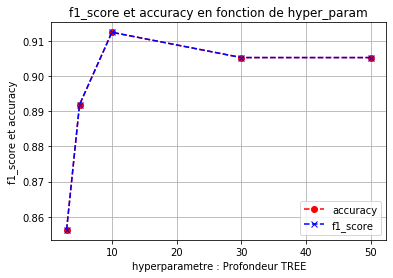

KNN :
    Best acc : 0.5020746887966805 49
    Best f1 :  0.9144054515832771 13


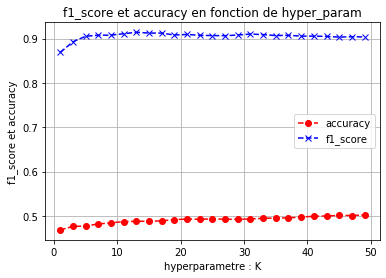

Bayes gauss no process :
    Best acc : 0.863125 1e-11
    Best f1 :  0.8631282080090656 1e-11


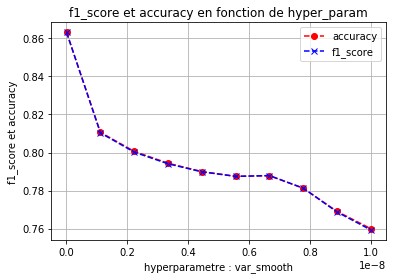

Bayes multinomial scale :
    Best acc : 0.7971875 0.2
    Best f1 :  0.7957806426077273 0.2


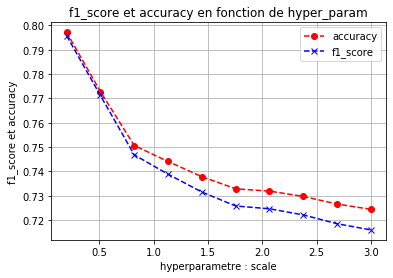

Bayes Discretization :
    Best acc : 0.82375 5
    Best f1 :  0.8237657172129786 5


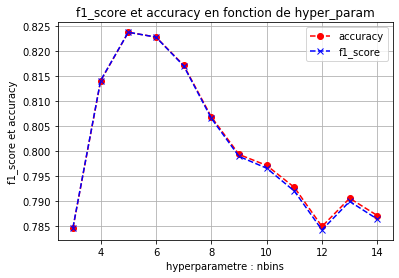

In [36]:
# Calcul de la meilleure profondeur de l'arbre de décision 
max_acc, max_f1, elem_acc, elem_f1, x_plot, acc_plot, f1_plot = best_hyper_param(decision_tree,X_train, X_test, Y_train, Y_test, list_zt)
print("zoo_tree :")
print("    Best acc :", max_acc, elem_acc)
print("    Best f1 : ", max_f1, elem_f1)
plot_hyper_param( x_plot, acc_plot, f1_plot, "Profondeur TREE")

# Calcul du meilleur nombre de voisins K
max_acc, max_f1, elem_acc, elem_f1, x_plot, acc_plot, f1_plot = best_hyper_param(KNN,X_train, X_test, Y_train, Y_test, list_K)
print("KNN :")
print("    Best acc :", max_acc, elem_acc)
print("    Best f1 : ", max_f1, elem_f1)
plot_hyper_param( x_plot, acc_plot, f1_plot, "K")

# Calcul du meilleur var_smooth
max_acc, max_f1, elem_acc, elem_f1, x_plot, acc_plot, f1_plot = best_hyper_param(bayes_gaussian_noProcess,X_train, X_test, Y_train, Y_test, list_var_smoothing)
print("Bayes gauss no process :")
print("    Best acc :", max_acc, elem_acc)
print("    Best f1 : ", max_f1, elem_f1)
plot_hyper_param( x_plot, acc_plot, f1_plot, "var_smooth")


# Calcul du meilleur scale
max_acc, max_f1, elem_acc, elem_f1, x_plot, acc_plot, f1_plot = best_hyper_param(bayes_mutltinomial_scaleData,X_train, X_test, Y_train, Y_test, list_scaler)
print("Bayes multinomial scale :")
print("    Best acc :", max_acc, elem_acc)
print("    Best f1 : ", max_f1, elem_f1)
plot_hyper_param( x_plot, acc_plot, f1_plot, "scale")


# Calcul du meilleur nbins
max_acc, max_f1, elem_acc, elem_f1, x_plot, acc_plot, f1_plot = best_hyper_param(bayes_multinomial_kbinDiscretization,X_train, X_test, Y_train, Y_test, list_nbins)
print("Bayes Discretization :")
print("    Best acc :", max_acc, elem_acc)
print("    Best f1 : ", max_f1, elem_f1)
plot_hyper_param( x_plot, acc_plot, f1_plot, "nbins")

zoo_tree mail:
    Best acc_mail : 0.9202898550724637 5
    Best f1_mail :  0.9194005938207366 5


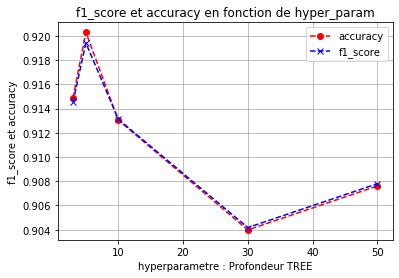

KNN_mail :
    Best acc_mail : 0.6276595744680851 5
    Best f1_mail :  0.8665467935196186 1


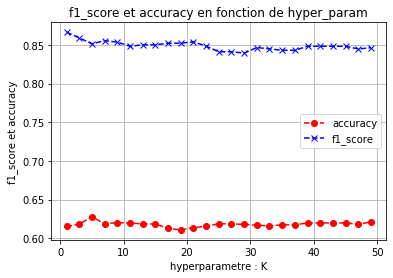

Bayes gauss no process mail :
    Best acc_mail : 0.7934782608695652 7.780000000000001e-09
    Best f1_mail :  0.7951737568793721 7.780000000000001e-09


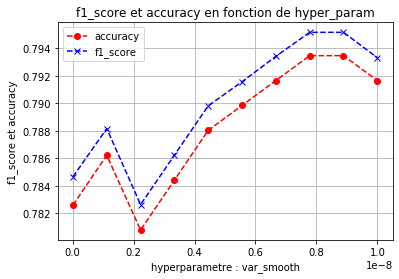

Bayes multinomial scale :
    Best acc_mail : 0.9039855072463768 0.8222222222222222
    Best f1_mail :  0.9039447240896517 0.8222222222222222


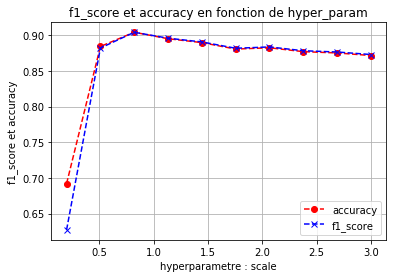

Bayes Discretization mail:
    Best acc_mail : 0.8097826086956522 14
    Best f1_mail :  0.8121061084651309 14


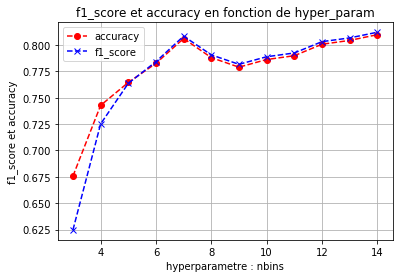

In [37]:
# Calcul de la meilleure profondeur de l'arbre de décision pour les spam 
max_acc_mail, max_f1_mail, elem_acc_mail, elem_f1_mail, x_plot_mail, acc_plot_mail, f1_plot_mail = best_hyper_param(decision_tree,X_mail_train, X_mail_test, Y_mail_train, Y_mail_test, list_zt)
print("zoo_tree mail:")
print("    Best acc_mail :", max_acc_mail, elem_acc_mail)
print("    Best f1_mail : ", max_f1_mail, elem_f1_mail)
plot_hyper_param( x_plot_mail, acc_plot_mail, f1_plot_mail, "Profondeur TREE")


# Calcul du meilleur nombre de voisins K pour les mail 
max_acc_mail, max_f1_mail, elem_acc_mail, elem_f1_mail, x_plot_mail, acc_plot_mail, f1_plot_mail = best_hyper_param(KNN,X_mail_train, X_mail_test, Y_mail_train, Y_mail_test, list_K)
print("KNN_mail :")
print("    Best acc_mail :", max_acc_mail, elem_acc_mail)
print("    Best f1_mail : ", max_f1_mail, elem_f1_mail)
plot_hyper_param( x_plot_mail, acc_plot_mail, f1_plot_mail, "K")

# Calcul du meilleur var pour les mail 
max_acc_mail, max_f1_mail, elem_acc_mail, elem_f1_mail, x_plot_mail, acc_plot_mail, f1_plot_mail = best_hyper_param(bayes_gaussian_noProcess,X_mail_train, X_mail_test, Y_mail_train, Y_mail_test, list_var_smoothing)
print("Bayes gauss no process mail :")
print("    Best acc_mail :", max_acc_mail, elem_acc_mail)
print("    Best f1_mail : ", max_f1_mail, elem_f1_mail)
plot_hyper_param( x_plot_mail, acc_plot_mail, f1_plot_mail, "var_smooth")

# Calcul du meilleur scale mail
max_acc_mail, max_f1_mail, elem_acc_mail, elem_f1_mail, x_plot_mail, acc_plot_mail, f1_plot_mail = best_hyper_param(bayes_mutltinomial_scaleData,X_mail_train, X_mail_test, Y_mail_train, Y_mail_test, list_scaler)
print("Bayes multinomial scale :")
print("    Best acc_mail :", max_acc_mail, elem_acc_mail)
print("    Best f1_mail : ", max_f1_mail, elem_f1_mail)
plot_hyper_param( x_plot_mail, acc_plot_mail, f1_plot_mail, "scale")

# Calcul du meilleur nbins mail
max_acc_mail, max_f1_mail, elem_acc_mail, elem_f1_mail, x_plot_mail, acc_plot_mail, f1_plot_mail = best_hyper_param(bayes_multinomial_kbinDiscretization,X_mail_train, X_mail_test, Y_mail_train, Y_mail_test, list_nbins)
print("Bayes Discretization mail:")
print("    Best acc_mail :", max_acc_mail, elem_acc_mail)
print("    Best f1_mail : ", max_f1_mail, elem_f1_mail)
plot_hyper_param( x_plot_mail, acc_plot_mail, f1_plot_mail, "nbins")

Dans ce cas, l'évolution de la précision de KNN en fonction de K est assez surprenante. En effet, on s'attendait plutôt que la précision chute avec l'augmentation de K. QU'EST-CE QUI EST A REVOIR!!!!!?????

On peut ainsi faire une étude similaire dans le cas du dataset des courriels.
Il faut toutefois faire attention ici, le dataset est plutôt restreint et les données ne sont pas également réparties. L'option 'Stratify' est donc importante, nous verifierons son bon fonctionnement.

On peut vérifier que l'option 'stratify' fonctionne bien comme voulue :

In [ ]:
den = np.size(Y_train)
num_train = np.size(np.where(Y_train ==0))
num_test = np.size(np.where(Y_train ==0))
print(num_train/den, num_test/den)

Les ratios sont quasi-identiques, le jeu de donnée est donc correctement balancé entre X_train et X_test

## Question 4
### Impact de la taille des ensembles de données sur la performance de classification
Plus l'ensemble de données est grand et plus le modèle est efficace. Si on utilise un trop petit nombre d'échantillons pour entraîner un modèle, il risque de ne pas être très performant lors de la prédiction. En effet, il est probable que le nombre d'échantillons atypiques soit sur-représentés.

Toutefois, la méthode de cross validation s'avère plus efficace quand il s'agit de traiter des petits ensembles de données.

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification
Dans un ensemble de données, le bruit peu diminuer les performances d'un modèle. Il est important de prendre un nombre d'échantillons assez grand pour éviter d'entraîner un modèle avec un nombre d'échantillons atypiques trop grand par rapport aux autres.

Toutefois, le bruit peut avoir des impacts différents sur certains modèles. Les arbres de décision sont peu robuste face aux bruits des données. On peut aussi prendre comme exemple KNN. Plus le bruit est important plus il est préférable d'augmenter l'hyperparamètre K (nombre de voisins) pour lisser l'effet du bruit.

## Question 6
### Discussion sur la nature des données

Comme nous l'avons évoqué précédemment, les galaxies sont équitablement réparties entre "smooth" et "spiral". En ce sens, ces proportions sont gardées dans les données de test et d'entrainement en utilisant la méthode "hold out". Ceci améliore donc la précision de notre étude. Par ailleurs, afin d'augmenter les performances de nos systèmes d'apprentissage, nous avons également utilisé différents prétraitements.

- Scale Data : permet de normaliser toutes les valeurs numériques des features dans un intervalle donné.

- K-bins discretizer : permet de ranger les valeurs suivant plusieurs intervalles. 

La composition du dataset des pourriels est tout autre. En effet, nous avons un ratio se rapprochant de 60% de pourriels et 40% de mails valides. Nous avons donc du utliser la méthode "stratify" afin de nous rapprocher d'une répartition de équitable dans le dataset. Nous pouvons donc utiliser la méthode hold out.

## Question 7
### Recommandations
L'amélioration que nous pourrions apporter se trouve dans la méthode utilisée (hold out) lors de l'étude des meilleurs paramètres. Nous avons donc utilisé la méthode hold out, car celle-ci est la moins coûteuse en termes de ressources comparativement à LOOCV et k-fold CV. L'idéal aurait été de faire l'étude des meilleurs paramètres avec la méthode LOOCV ainsi que les tests sur nos données. L'erreur sur les l'ensemble des données de test et d'apprentissage sont réduites au maximum et améliore l'apprentissage.

## Question 8
### Améliorations possibles
Dans ce lab, nous avons exploré 3 types de modèles, mais un autre modèle pourrait peut-être être plus performant dans notre cas. On pourrait tester un plus grand nombre de modèles comme par exemple un réseau de neurones ou des SVM. Par ailleurs, il serait judicieux d'augmenter le nombre d'échantillons du dataset des mails et faire en sorte que le nombre de spams soit environ égale à celui des mails. On pourrait par exemple utiliser des techniques d'augmentation de données.

## Conclusion
Au cours de ce laboratoire nous avons vu différents modèles d'apprentissage machine ainsi que deux méthodes d'apprentissage (hold out et K-fold CV). Les modèles que nous avons étudiés sont sujet ou non à des prétraitements. Ces derniers peuvent améliorer la qualité de l'apprentissage. Par ailleurs, nous avons donc pu observer que la méthode K-fold rendait l'apprentissage plus efficace, mais demandait davantage de ressources comparées à la méthode hold out sur les mêmes caractéristiques de modèle. Il est donc nécessaire pour un ingénieur de savoir utiliser l'ensemble de ces modèles et méthode d'apprentissage afin de retirer le meilleur compromis pour les applications visées.